In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph langchain_google_genai serpapi tavily-python langchain_community langchain_groq langchain_openai

In [3]:
from google.colab import userdata
google_api_key = userdata.get('GEMINI_API_KEY')


In [4]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KET')
SERPAPI_API_KEY = userdata.get('SERPAPI_API_KEY')
open_api_key = userdata.get('OPENAI_API_KEY')

In [5]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

In [6]:
# from langchain_groq import ChatGroq
# llm = ChatGroq(
#     model="gemma2-9b-it",
#     max_retries=2,
#     api_key=groq_api_key
# )

# llm.invoke("greet me")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 7.596e-05, 'queue_time': 0.023044297000000002, 'total_time': 0.027348687}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-3e09c77e-f830-4554-ba0e-202863efb04f-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})

In [51]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini", api_key=open_api_key)
llm.invoke("greet me")


AIMessage(content='Hello! How are you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 10, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-112669ab-8340-4ff6-969b-4eb7bdfeef70-0', usage_metadata={'input_tokens': 10, 'output_tokens': 8, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
# from langchain_core.messages import AIMessage, HumanMessage, SystemMessage,ToolMessage
# from langchain_google_genai import ChatGoogleGenerativeAI
# llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=google_api_key)
# messages = [HumanMessage(content="What is your name?")]
# result = llm.invoke(messages)
# print(result)


content="I don't have a name. I am a large language model, trained by Google." additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-8404c701-7bf2-4d8e-9595-20632a226146-0' usage_metadata={'input_tokens': 6, 'output_tokens': 20, 'total_tokens': 26, 'input_token_details': {'cache_read': 0}}


In [ ]:
# from langgraph.graph import MessagesState
# from typing import TypedDict, List, Annotated, Union
# from langchain_core.messages import AIMessage, HumanMessage, SystemMessage,ToolMessage
# import operator
# class AgentState(TypedDict):
#     messages: Annotated[List[Union[HumanMessage, AIMessage, SystemMessage]], operator.add]
#     # budget: float
#     # interests: List[str]
#     # companions: int
#     # city: str
#     # days: int
#     # travel_date: str
#     # itinerary: List[dict]  # To store the final itinerary


In [52]:
from langgraph.graph import MessagesState
from typing import TypedDict, List, Annotated, Union
class AgentState(MessagesState):
    # pass
    # messages: Annotated[List[Union[HumanMessage, AIMessage, SystemMessage]], operator.add]
    budget: float
    interests: List[str]
    companions: int
    city: str
    days: int
    travel_date: str
    itinerary: List[dict]  # To store the final itinerary


In [53]:
def get_system_prompt(state: AgentState):
    return f"""You are a smart travel assistant. Create a detailed itinerary in JSON format considering:
    - Budget: ${state['budget']}
    - Travel Interests: {', '.join(state['interests'])}
    - Companions: {state['companions']} people
    - Destination: {state['city']}
    - Duration: {state['days']} days
    - Travel Date: {state['travel_date']}

    Use the hotels_finder tool to get hotel information and the image_finder tool to get high-quality images for activities and locations.

    For each activity or location, use the image_finder tool to search for relevant images. Choose the best image that represents the location or activity.

    The response should be a valid JSON object with the following structure:
    {{
        "trip_details": {{
            "destination": string,
            "duration": number,
            "travel_date": string,
            "companions": number,
            "budget": number,
            "interests": string[]
        }},
        "daily_itinerary": [
            {{
                "day": number,
                "date": string,
                "hotel": {{
                    "name": string,
                    "price": number,
                    "rating": number,
                    "reviews": number,
                    "image_url": string,
                    "booking_url": string
                }},
                "transportation": {{
                    "type": string,
                    "cost": number
                }},
                "meals": [
                    {{
                        "type": string,
                        "venue": string,
                        "cost": number,
                        "image_url": string
                    }}
                ],
                "activities": [
                    {{
                        "name": string,
                        "description": string,
                        "cost": number,
                        "image_url": string,
                        "location_images": [
                            {{
                                "url": string,
                                "title": string,
                                "source": string
                            }}
                        ]
                    }}
                ],
                "daily_total": number
            }}
        ],
        "total_cost": number,
        "remaining_budget": number
    }}

    For each activity:
    1. Use image_finder to get relevant images of the location/activity
    2. Include multiple images in the location_images array
    3. Ensure all image URLs are valid and accessible
    """

In [54]:
from langchain_core.tools import tool

from typing import Optional

from pydantic import BaseModel, Field
import serpapi
# from langchain.pydantic_v1 import BaseModel, Field
from langchain_core.tools import tool

class HotelsInput(BaseModel):
    q: str = Field(description='Location of the hotel')
    check_in_date: str = Field(description='Check-in date. The format is YYYY-MM-DD. e.g. 2024-06-22')
    check_out_date: str = Field(description='Check-out date. The format is YYYY-MM-DD. e.g. 2024-06-28')
    sort_by: Optional[str] = Field(8, description='Parameter is used for sorting the results. Default is sort by highest rating')
    adults: Optional[int] = Field(1, description='Number of adults. Default to 1.')
    children: Optional[int] = Field(0, description='Number of children. Default to 0.')
    rooms: Optional[int] = Field(1, description='Number of rooms. Default to 1.')
    hotel_class: Optional[str] = Field(
        None, description='Parameter defines to include only certain hotel class in the results. for example- 2,3,4')


class HotelsInputSchema(BaseModel):
    params: HotelsInput


@tool(args_schema=HotelsInputSchema)
def hotels_finder(params: HotelsInput):
    '''
    Find hotels using the Google Hotels engine.

    Returns:
        dict: Hotel search results.
    '''
    print(f"calling...")



    params = {
        'api_key': SERPAPI_API_KEY,
        'engine': 'google_hotels',
        'hl': 'en',
        'gl': 'pk',
        'q': params.q,
        'check_in_date': params.check_in_date,
        'check_out_date': params.check_out_date,
        'currency': 'PKR',
        'adults': params.adults,
        'children': params.children,
        'rooms': params.rooms,
        'sort_by': params.sort_by,
        'hotel_class': params.hotel_class
    }
    print(f"calling again...")

    search = serpapi.search(params)
    results = search.data
    print(f"hotels results",results)
    return results['properties'][:5]




In [21]:


# params = {
#   "engine": "google_images",
#   "q": "Coffee",
#   "location": "Austin, TX, Texas, United States",
#   "api_key": "b3b9af9980f5c2d3e0b0a93e320ea0062f861b5914603bfb322f2ad88c9b2b3e"
# }

# search = serpapi.search(params)
# results = search.data
# print(results)




{'search_metadata': {'id': '679e3eb46b0b01bbe0b3af96', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/c5d60cf7aad77fc2/679e3eb46b0b01bbe0b3af96.json', 'created_at': '2025-02-01 15:33:08 UTC', 'processed_at': '2025-02-01 15:33:08 UTC', 'google_images_url': 'https://www.google.com/search?q=Coffee&oq=Coffee&uule=w+CAIQICIdQXVzdGluLFRYLFRleGFzLFVuaXRlZCBTdGF0ZXM&hl=en&gl=us&tbm=isch', 'raw_html_file': 'https://serpapi.com/searches/c5d60cf7aad77fc2/679e3eb46b0b01bbe0b3af96.html', 'total_time_taken': 3.13}, 'search_parameters': {'engine': 'google_images', 'q': 'Coffee', 'location_requested': 'Austin, TX, Texas, United States', 'location_used': 'Austin,TX,Texas,United States', 'google_domain': 'google.com', 'hl': 'en', 'gl': 'us', 'device': 'desktop'}, 'search_information': {'image_results_state': 'Results for exact spelling'}, 'suggested_searches': [{'name': 'Cup', 'link': 'https://www.google.com/search?sca_esv=f56a266850138bc2&gl=us&hl=en&q=coffee+cup&uds=ABqPDvztZD_Nu1

In [55]:
from pydantic import BaseModel, Field
from typing import Optional, List





# Define Pydantic Models
class ImageSearchInput(BaseModel):
    q: str = Field(description="Search query for the image")
    safe: Optional[str] = Field("active", description="Safe search setting: active, moderate, or off")


class ImageSearchInputSchema(BaseModel):
    params: ImageSearchInput


# Define Image Search Function
def image_finder(params: ImageSearchInput) -> List[dict]:
    """
    Find images using Google Images via SerpAPI.
    Returns a list of image results with URLs and metadata.
    """
    search_params = {
        "api_key": SERPAPI_API_KEY,
        "engine": "google_images",
        "q": params.q,
        "safe": params.safe,
        "hl": "en",
        "gl": "pk",
    }

    search = serpapi.search(search_params)
    results = search.data

    if "images_results" in results:
        images = results["images_results"]
        processed_results = [
            {
                "original": img.get("original", ""),
                "thumbnail": img.get("thumbnail", ""),
                "title": img.get("title", ""),
                "source": img.get("source", ""),
                "width": img.get("original_width", 0),
                "height": img.get("original_height", 0),
            }
            for img in images
        ]
        return processed_results

    return []  # Return an empty list if no images found


In [49]:
# from pydantic import BaseModel, Field
# from typing import Optional, List





# # Define Pydantic Models
# class ImageSearchInput(BaseModel):
#     q: str = Field(description="Search query for the image")
#     safe: Optional[str] = Field("active", description="Safe search setting: active, moderate, or off")


# class ImageSearchInputSchema(BaseModel):
#     params: ImageSearchInput


# # Define Image Search Function
# def image_finder(params: ImageSearchInput) -> List[dict]:
#     """
#     Find images using Google Images via SerpAPI.
#     Returns a list of image results with URLs and metadata.
#     """
#     search_params = {
#         "api_key": SERPAPI_API_KEY,
#         "engine": "google_images",
#         "q": params.q,
#         "safe": params.safe,
#         "hl": "en",
#         "gl": "pk",
#     }

#     search = serpapi.search(search_params)
#     results = search.data

#     if "images_results" in results:
#         images = results["images_results"]
#         processed_results = [
#             {
#                 "original": img.get("original", ""),
#                 "thumbnail": img.get("thumbnail", ""),
#                 "title": img.get("title", ""),
#                 "source": img.get("source", ""),
#                 "width": img.get("original_width", 0),
#                 "height": img.get("original_height", 0),
#             }
#             for img in images
#         ]
#         return processed_results

#     return []  # Return an empty list if no images found


# # Run the Image Search
# if __name__ == "__main__":
#     # Define input parameters
#     search_input = ImageSearchInput(q="Coffee", safe="active")

#     # Call the function and get image results
#     image_results = image_finder(search_input)

#     # Print results
#     print("Image Search Results:",image_results)
#     for img in image_results:
#         print(img)


Image Search Results: [{'original': 'https://images.pexels.com/photos/312418/pexels-photo-312418.jpeg?cs=srgb&dl=pexels-chevanon-312418.jpg&fm=jpg', 'thumbnail': 'https://serpapi.com/searches/679e46c156f17dc376f05caa/images/6b53f4f1208f067444966adad212cbd7c3973a17062f28464c29a496382faa18.jpeg', 'title': '60,000+ Best Coffee Photos · 100% Free ...', 'source': 'Pexels', 'width': 4016, 'height': 6016}, {'original': 'https://www.spectrumhealth.ie/wp-content/uploads/2017/11/steamingcupofcoffeewithspiltcoffeebeans.jpg', 'thumbnail': 'https://serpapi.com/searches/679e46c156f17dc376f05caa/images/6b53f4f1208f0674ce87c004f88e936984953b795e9701c779fa9ceb63ebd1b4.jpeg', 'title': 'Pros and Cons of drinking coffee ...', 'source': 'Spectrum Health', 'width': 2121, 'height': 1414}, {'original': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Latte_and_dark_coffee.jpg/1200px-Latte_and_dark_coffee.jpg', 'thumbnail': 'https://serpapi.com/searches/679e46c156f17dc376f05caa/images/6b53f4f1208f067

In [ ]:
# from langchain_google_genai import ChatGoogleGenerativeAI

# def multiply(a: int, b: int) -> int:
#     """Multiply a and b.

#     Args:
#         a: first int
#         b: second int
#     """
#     return a * b

# # This will be a tool
# def add(a: int, b: int) -> int:
#     """Adds a and b.

#     Args:
#         a: first int
#         b: second int
#     """
#     return a + b

# def divide(a: int, b: int) -> float:
#     """Divide a and b.

#     Args:
#         a: first int
#         b: second int
#     """
#     return a / b

# tools = [add, multiply, divide]
# llm_with_tools = llm.bind_tools(tools)

In [56]:
# from langchain_community.tools.tavily_search import TavilySearchResults
# from pydantic import BaseModel



# tool = TavilySearchResults(max_results=2)
tools = [hotels_finder,image_finder]
llm_with_tools = llm.bind_tools(tools)

In [24]:
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7bb946c61590>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7bb946c38210>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'hotels_finder', 'description': 'Find hotels using the Google Hotels engine.\n\nReturns:\n    dict: Hotel search results.', 'parameters': {'properties': {'params': {'properties': {'q': {'description': 'Location of the hotel', 'type': 'string'}, 'check_in_date': {'description': 'Check-in date. The format is YYYY-MM-DD. e.g. 2024-06-22', 'type': 'string'}, 'check_out_date': {'description': 'Check-out date. The format is YYYY-MM-DD. e.g. 2024-06-28', 'type': 'string'}, 'sort_by': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': 8, 'description': 'Parameter is used for sorting the results. Default is sort by highest rating'}, 'adults': {'any

In [57]:
llm_with_tools.kwargs

{'tools': [{'type': 'function',
   'function': {'name': 'hotels_finder',
    'description': 'Find hotels using the Google Hotels engine.\n\nReturns:\n    dict: Hotel search results.',
    'parameters': {'properties': {'params': {'properties': {'q': {'description': 'Location of the hotel',
         'type': 'string'},
        'check_in_date': {'description': 'Check-in date. The format is YYYY-MM-DD. e.g. 2024-06-22',
         'type': 'string'},
        'check_out_date': {'description': 'Check-out date. The format is YYYY-MM-DD. e.g. 2024-06-28',
         'type': 'string'},
        'sort_by': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
         'default': 8,
         'description': 'Parameter is used for sorting the results. Default is sort by highest rating'},
        'adults': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
         'default': 1,
         'description': 'Number of adults. Default to 1.'},
        'children': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
  

In [58]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage
import datetime
import operator

CURRENT_YEAR = datetime.datetime.now().year

# sys_msg = SystemMessage(content=get_system_prompt(state))
def assistant(state: AgentState)->AgentState:
    system_prompt = SystemMessage(content=get_system_prompt(state))
    # messages = [system_prompt] + state['messages']
    # # messages = state['messages']
    # response = llm_with_tools.invoke(messages)
    # # response = llm.invoke(messages)
    # return {"messages": [response]}
    print("state",[system_prompt] + state["messages"])
    return {"messages": [llm_with_tools.invoke([system_prompt] + state["messages"])]}


# # Node
# def assistant(state: AgentState) -> AgentState:
#    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

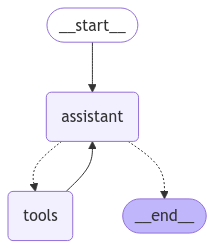

In [59]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph

# Graph
builder: StateGraph = StateGraph(AgentState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph: CompiledStateGraph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [60]:
initial_state = {
    "messages": [HumanMessage(content="Plan my trip to Pakistan")],
    "budget": 5000.0,
    "interests": ["sightseeing", "local cuisine"],
    "companions": 2,
    "city": "Skardu",
    "days": 7,
    "travel_date": "2025-10-03",
    "itinerary": []
}


In [61]:
config1 = {"configurable": {"thread_id": "1"}}

In [62]:
# Specify an input
# messages = [HumanMessage(content="Plan my trip to Pakistan")]

# Run
messages = react_graph.invoke(initial_state,config1)
print("\n[FINAL RESPONSE]\n",messages)
for m in messages['messages']:
    m.pretty_print()

state [SystemMessage(content='You are a smart travel assistant. Create a detailed itinerary in JSON format considering:\n    - Budget: $5000.0\n    - Travel Interests: sightseeing, local cuisine\n    - Companions: 2 people\n    - Destination: Skardu\n    - Duration: 7 days\n    - Travel Date: 2025-10-03\n\n    Use the hotels_finder tool to get hotel information and the image_finder tool to get high-quality images for activities and locations.\n    \n    For each activity or location, use the image_finder tool to search for relevant images. Choose the best image that represents the location or activity.\n\n    The response should be a valid JSON object with the following structure:\n    {\n        "trip_details": {\n            "destination": string,\n            "duration": number,\n            "travel_date": string,\n            "companions": number,\n            "budget": number,\n            "interests": string[]\n        },\n        "daily_itinerary": [\n            {\n            

calling...
calling again...


hotels results {'search_metadata': {'id': '679e495eaf6e92b8dc049713', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/6457112189961902/679e495eaf6e92b8dc049713.json', 'created_at': '2025-02-01 16:18:38 UTC', 'processed_at': '2025-02-01 16:18:38 UTC', 'google_hotels_url': 'https://www.google.com/_/TravelFrontendUi/data/batchexecute?rpcids=AtySUc&source-path=/travel/search&hl=en&gl=pk&rt=c&soc-app=162&soc-platform=1&soc-device=1', 'raw_html_file': 'https://serpapi.com/searches/6457112189961902/679e495eaf6e92b8dc049713.html', 'prettify_html_file': 'https://serpapi.com/searches/6457112189961902/679e495eaf6e92b8dc049713.prettify', 'total_time_taken': 1.05}, 'search_parameters': {'engine': 'google_hotels', 'q': 'Skardu', 'gl': 'pk', 'hl': 'en', 'currency': 'PKR', 'check_in_date': '2025-10-03', 'check_out_date': '2025-10-10', 'adults': 2, 'children': 0, 'sort_by': '8'}, 'search_information': {'total_results': 279}, 'properties': [{'type': 'hotel', 'name': 'The Que Skardu',

state [SystemMessage(content='You are a smart travel assistant. Create a detailed itinerary in JSON format considering:\n    - Budget: $5000.0\n    - Travel Interests: sightseeing, local cuisine\n    - Companions: 2 people\n    - Destination: Skardu\n    - Duration: 7 days\n    - Travel Date: 2025-10-03\n\n    Use the hotels_finder tool to get hotel information and the image_finder tool to get high-quality images for activities and locations.\n    \n    For each activity or location, use the image_finder tool to search for relevant images. Choose the best image that represents the location or activity.\n\n    The response should be a valid JSON object with the following structure:\n    {\n        "trip_details": {\n            "destination": string,\n            "duration": number,\n            "travel_date": string,\n            "companions": number,\n            "budget": number,\n            "interests": string[]\n        },\n        "daily_itinerary": [\n            {\n            


[FINAL RESPONSE]
 {'messages': [HumanMessage(content='Plan my trip to Pakistan', additional_kwargs={}, response_metadata={}, id='b85052eb-0bc0-4a65-948f-5bd337a4a30c'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_dEVqw2cpYmFOpTR1Wjh9KyCi', 'function': {'arguments': '{"params": {"q": "Skardu", "check_in_date": "2025-10-03", "check_out_date": "2025-10-10", "sort_by": "8", "adults": 2, "rooms": 1}}', 'name': 'hotels_finder'}, 'type': 'function'}, {'id': 'call_U7qNgTmdK1pNA6lgz7hWfyox', 'function': {'arguments': '{"params": {"q": "Skardu", "safe": "active"}}', 'name': 'image_finder'}, 'type': 'function'}, {'id': 'call_e5Kf9TK4mTJe4uE6dWJEdfae', 'function': {'arguments': '{"params": {"q": "Kachura Lake", "safe": "active"}}', 'name': 'image_finder'}, 'type': 'function'}, {'id': 'call_zIGWqoTt2d9uKAOqrwMieTVZ', 'function': {'arguments': '{"params": {"q": "Shigar Fort", "safe": "active"}}', 'name': 'image_finder'}, 'type': 'function'}, {'id': 'call_GrDi53wwyHEyUCYlUL6

In [ ]:
print("\n[FINAL RESPONSE]\n",messages)


[FINAL RESPONSE]
 {'messages': [HumanMessage(content='Plan my trip to Pakistan', additional_kwargs={}, response_metadata={}, id='ae2cce99-88d3-4f20-bbd0-a8096d365e30'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_V1XnBdTXIp5rxifurzGLKKhr', 'function': {'arguments': '{"params": {"q": "Skardu", "check_in_date": "2025-10-03", "check_out_date": "2025-10-10", "adults": 2}}', 'name': 'hotels_finder'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 366, 'total_tokens': 430, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5a0f212a-c209-4a53-b265-66c16c952a77-0', tool_calls=[{'name': 'hotels_finder', 'args': {'

In [ ]:
# from langchain_core.messages import AIMessage, HumanMessage, SystemMessage,ToolMessage
# from langgraph.prebuilt import tools_condition, ToolNode
# from langgraph.graph import StateGraph, END ,START
# from IPython.display import display, Image
# from langgraph.checkpoint.memory import MemorySaver
# from langgraph.graph.state import CompiledStateGraph
# from langgraph.graph import MessagesState

# def assistant(state: MessagesState)->MessagesState:
#     # system_prompt = SystemMessage(content=get_system_prompt(state))
#     # messages = [system_prompt] + state['messages']
#     messages = state['messages']
#     response = llm_with_tools.invoke(messages)
#     # response = llm.invoke(messages)
#     return {"messages": [response]}

# # # New itinerary creation node
# # def create_itinerary(state: AgentState):
# #     # Parse tool responses and format itinerary
# #     itinerary = []
# #     tool_results = [msg.content for msg in state['messages'] if isinstance(msg, ToolMessage)]

# #     # Create structured itinerary (simplified example)
# #     itinerary_entry = {
# #         "city": state['city'],
# #         "days": state['days'],
# #         "daily_plan": [],
# #         "total_estimated_cost": state['budget']
# #     }

# #     # Add parsed tool data to itinerary
# #     for result in tool_results:
# #         if 'hotels' in result:
# #             itinerary_entry['hotels'] = result['hotels'][:3]  # Top 3 hotels

# #     return {"itinerary": [itinerary_entry], "messages": [AIMessage(content="Itinerary created!")]}

# # Modified graph construction
# builder = StateGraph(MessagesState)
# builder.add_node("assistant", assistant)
# builder.add_node("tools", ToolNode([tools]))  # Add other tools as needed
# # builder.add_node("create_itinerary", create_itinerary)

# # Edge connections
# builder.add_edge(START, "assistant")
# builder.add_conditional_edges(
#     "assistant",
#     # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
#     # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
#     tools_condition,
# )
# # builder.add_conditional_edges(
# #     "assistant",
# #     tools_condition,
# #     {
# #         "call_tools": "tools",
# #         "continue": "create_itinerary"
# #     }
# # )
# builder.add_edge("tools", "assistant")




# memory: MemorySaver = MemorySaver()
# graph: CompiledStateGraph = builder.compile( checkpointer=memory)

# # Show
# display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [ ]:
messages = graph.invoke({"messages": messages},config1)
for m in messages['messages']:
    m.pretty_print()

In [ ]:
result = graph.invoke(
    initial_state,
    config1
)

ERROR:grpc._plugin_wrapping:AuthMetadataPluginCallback "<google.auth.transport.grpc.AuthMetadataPlugin object at 0x79cc890d4e10>" raised exception!
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 128, in refresh
    self._retrieve_info(request)
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 101, in _retrieve_info
    info = _metadata.get_service_account_info(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 323, in get_service_account_info
    return get(request, path, params={"recursive": "true"})
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 248, in get
    raise exceptions.TransportError(
google.auth.exceptions.TransportError: ("Failed to retrieve http:

KeyboardInterrupt: 